# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

### 1. Is the distribution of body temperatures normal?
#### Answer: 
To understand if the distribution of the body temperatures are normal, we first compute the mean and standard deviation of this data. We then assume a normal distribution given these parameters.  We can then compute the PDF based on this data and the actual data. We furtheremore, compare the ECDFs as the latter are not prone to bin bias. 

In [16]:
def ecdf(x):
    """compute the ecdf of
     data x
    """
    x = np.sort(x)
    y = np.arange(1, len(x)+1) /len(x)
    
    return x,y
    

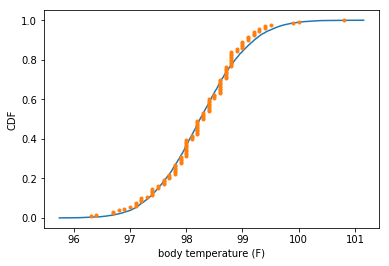

130


In [31]:
# Your work here.

import matplotlib.pyplot as plt
import numpy as np

# Compute mean and standard deviation
mu = np.mean(np.array(df['temperature']))
sigma = np.std(np.array(df['temperature']))

# Sample out of a normal distribution with this mu and sigma
samples = np.random.normal(mu, sigma, size = 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(np.array(df['temperature']))

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('body temperature (F)')
_ = plt.ylabel('CDF')

#_ = plt.hist(np.array(df['temperature']), bins = 1000, normed = True, histtype='step')
plt.show()

print(len(df['temperature']))

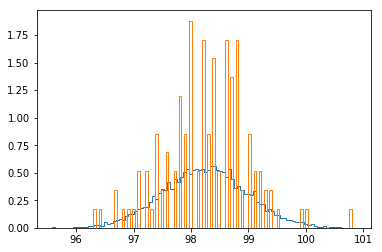

In [30]:
# Compare the PDF
_ = plt.hist(samples, bins = 100, normed = True, histtype='step')
_ = plt.hist(np.array(df['temperature']), bins = 100, normed = True, histtype='step')
plt.show()

We can see from the CDF plot, that the results computed based on the actual data, does not perfectly match the theoretical CDF. We can generally observe a shift towards right in the middle region and then a left shift as we move up. Looking at teh PDF plots, we also notice that the distributions are different. But then the questions is, is this difference statistically significant. We can perform additional tests to assess this. one other graphical approach would be to generate Q-Q plots.

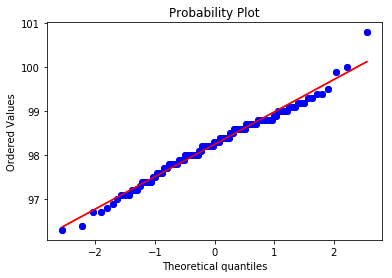

In [36]:
import scipy.stats as stats
import pylab
_ = stats.probplot(np.array(df['temperature']), dist="norm", plot=pylab)
pylab.show()

We observe from this plot that measured temperaturs generally stay on the line. A yet better approach would be to perform a statistical test. Here, out null hypothesis would be "The data is not significantly different that then a normal distribution". Therefore we want to accept the null hypothesis. In other words, assuming the population has a normal distribution, the probability of seeing such temperature sample measurements should be high (> 0.05).

In [39]:
print(stats.ks_2samp(np.array(df['temperature']), samples))

Ks_2sampResult(statistic=0.064661538461538437, pvalue=0.64250791608110369)


First value indicates the K-S statistic and the second value is the p-value. Small value of the K-S statistic and high p-value indicates that the null hypothesis cannot be rejected. Therefore, i conclude that the body temperatures have a normal distribution.

### 2. Is the sample size large? Are the observations independent?

#### Answer:

One of the assumptions of most tests is that the observations are independent of each other. This assumption is violated when the value of one observation tends to be too similar to the values of other observations. A common source of non-independence is that observations are close together in space or time. Looking at the source article for the data it is described that measurements were done for 140 healthy volunteers. Oral temperatures were measured one to four times daily for 3 consecutive days using an electronic digital thermometer. Therefore, in the sample data it can be that there are several body temperatures reported for the same person under similar thermal conditions, and since these are taken in close time intervals, they can be dependent on each other. 

The sample size of this data in this exercise is 130, which indicates not a large data set.


### 3. Is the true population mean really 98.6 degrees F?
* Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the  tt  or  zz  statistic?
* Now try using the other test. How is the result be different? Why?

#### Answer:
For this case, I would use a one-sample test as we would want to compare the mean of the sample temperatures to the true mean value provided. Our null hypothesis states that the two mean values are not significantly different and any observed differecnce is due to chance.T-tests are normally used for sample sizes < 30 and for a sample size of 130 we could compute the z-test assuming that the sample is representative of the population. 
We will be using a significance level of 0.025 considering a two-tailed test. P-values smaller than this are considered significant. 




In [61]:
print("samples mean value:", np.mean(np.array(df['temperature'])))
trueMean = 98.6

#compute the t-test
t = stats.ttest_1samp(np.array(df['temperature']), trueMean)
print("T-value : %6.3F, p-value: %6.9F"% (abs(t[0]), t[1]))

#computet the z-test
from statsmodels.stats.weightstats import ztest
z = ztest(np.array(df['temperature']), value=trueMean)
print("Z-value : %6.3F, p-value: %6.9F" % (abs(z[0]), z[1]))

samples mean value: 98.2492307692
T-value :  5.455, p-value: 0.000000241
Z-value :  5.455, p-value: 0.000000049


As can be seen a p-values of 2.41e-07 and 4.90e-08 weres computed, which indicates that the observed result is significant and not due to chance, therefore we reject the null hypothesis.
Also note that the t- and the z- values are identical as a t-test with 129 degrees of freedom would roughly model a z-test.

### 4. Draw a small sample of size 10 from the data and repeat both tests.
* Which one is the correct one to use?
* What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

#### Answer:
Here the t-test would be more suitable as the sample size of 10 is small (< 30) and therefore the standard deviation of the sample is not an estimate of the population standard deviation.

In [138]:
temperature_sample = np.random.choice(np.array(df['temperature']), size = 10, replace = False)

#compute the t-test
t = stats.ttest_1samp(temperature_sample, trueMean)
print("T-value : %6.3F, p-value: %6.9F"% (abs(t[0]), t[1]))

#computet the z-test
z = ztest(temperature_sample, value=trueMean)
print("Z-value : %6.3F, p-value: %6.9F"% (abs(z[0]), z[1]))

T-value :  2.973, p-value: 0.015622228
Z-value :  2.973, p-value: 0.002947567


The p-values of often differ noticaebly which indicates the difference in the shape of the distribution of the t and z values (not normal vs. normal). 

#### 5. At what temperature should we consider someone's temperature to be "abnormal"?
* Start by computing the margin of error and confidence interval.

We can assume that the distribution of the mean values (if we take multiple set of samples and calculate their means) follows a normal z-distribution (assuming n is large, here n=130 > 30). We can approximate the mean of this mean distribution from the sample temperature data and approximate the standard deviation by computing the standard error of mean (SEM) value (denotes as sigma) below. We then compute the 95% confidence interval, which corresponds to 1.96 times the sigma value on both sides of the mean. 

In [156]:
# Calculating the Margin of error
zscore = 1.96 # 95% Confidence level
n = 130
mean = np.mean(np.array(df['temperature']))
sigma = np.std(np.array(df['temperature'])) / np.sqrt(n)

# margin of error
margin = abs(zscore*sigma)
CI = [mean + margin, mean - margin]
print("95% confidence interval" , (CI[1],CI[0]))
            

95% confidence interval (98.123679804428164, 98.374781734033334)


Therefore we can consider temperatures below 98.12 and above 98.37 as abnormal. We could alternatively use the stats package to comupute the 95% confidence interval. It is worth checking this here to see if we get the same interval values, which is indeed the case.

In [158]:
stats.norm.interval(0.95, loc=np.mean(np.array(df['temperature'])), scale=stats.sem(np.array(df['temperature'])))

(98.123196428181629, 98.375265110279869)

#### 6. Is there a significant difference between males and females in normal temperature?
* What test did you use and why?
* Write a story with your conclusion in the context of the original problem

#### Answer:
A two-sample ztest would be appropriate here as we are now comparing the mean values of the two sample sets, anmes the female temperatures and the male temperatures. A p-value of < 0.025 would be considered significant. Our null hypothesis states that there is no significant difference betwwen the male and female body temperatures.

In [165]:
# Male temperatures
maleT = df.temperature[df.gender == 'M']

# Female temperatures
femaleT = df.temperature[df.gender == 'F']
print(len(maleT),len(femaleT))

z = ztest(maleT, femaleT)
print("Z-value : %6.3F, p-value: %6.9F"% (abs(z[0]), z[1]))

65 65
Z-value :  2.285, p-value: 0.022287361


We observe that the p-value is less than 0.025, therefore we may reject the null hypothesis. However the p-values stay pretty close to the confidence level and further tests are necessary in order to conclude that the male and female temperatures are significantly different.